# Advanced Predictive Analytics (APA)
## Course Code (CC) - MDI - 3003
### Laboratory (Lab)
#### Digital Assignment - 04

## Random Forest Algorithm Agricultural Crop Recommendation System Task Job Process Work
### Custom User Own Client Customer Individual Synthetic Dataset  
### DataSet Used :- Agricultural Crop Recommendation Dataset 
#### Python Programming Coding Scripting Computer Science Language
#### Jupyter Notebook Core Main Crux Framework Library Module Binary Package  

# Random Forest Algorithm Agricultural Crop Recommendation System Task Job Process Work
## Student: Dharshan Raj P A
## Register Roll Number ID: 22MIC0073
## Date: 19-09-2025

### Libraries Installation

In [1]:
!pip install yellowbrick dtreeviz disutils  

## Library Imports and Setup


In [2]:
# Essential library imports for data analysis and machine learning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Configure visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


## Dataset Loading and Initial Inspection


In [3]:
# Loading agricultural dataset
agriculturalDataFrame = pd.read_csv('Crop_recommendation.csv')

# Initial dataset inspection
print("Dataset Dimensions:", agriculturalDataFrame.shape)
print("\nSample Data Preview:")
agriculturalDataFrame.head()


Dataset Dimensions: (2200, 8)

Sample Data Preview:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Dataset Information and Statistical Analysis


In [4]:
# Comprehensive dataset analysis
print("Dataset Information:")
print(agriculturalDataFrame.info())
print("\nStatistical Summary:")
agriculturalDataFrame.describe()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None

Statistical Summary:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Missing Data Analysis


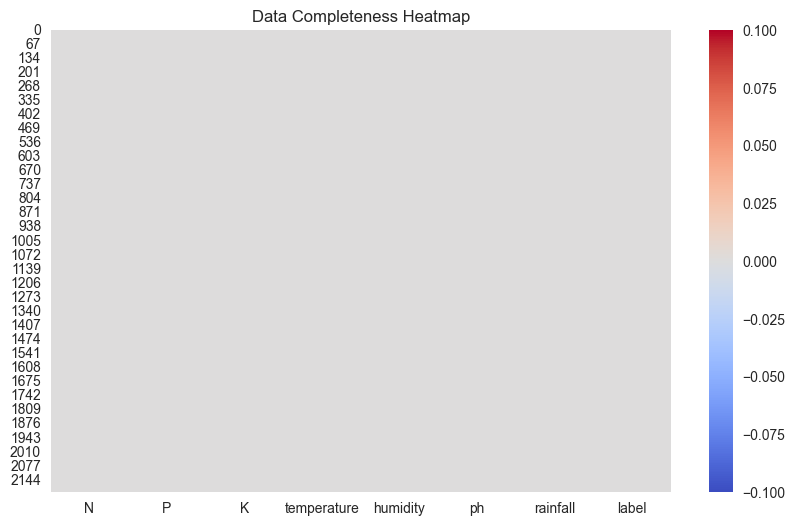

Missing data count by column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [5]:
# Missing data analysis using heatmap visualization
plt.figure(figsize=(10, 6))
sns.heatmap(agriculturalDataFrame.isnull(), cmap="coolwarm", cbar=True)
plt.title("Data Completeness Heatmap")
plt.show()

print("Missing data count by column:")
print(agriculturalDataFrame.isnull().sum())


## Temperature and pH Distribution Analysis


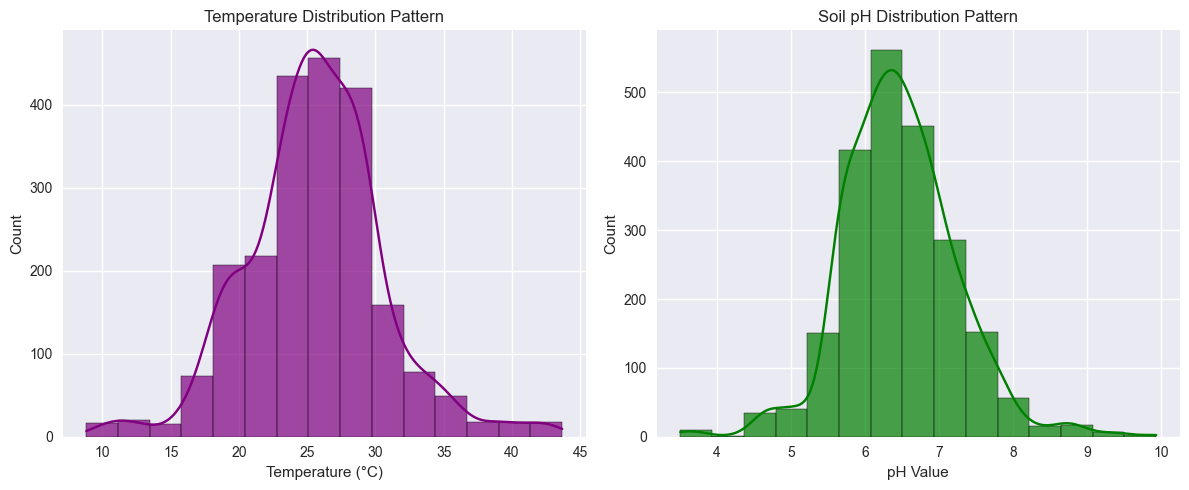

In [6]:
# Temperature and pH distribution analysis
# Both variables exhibit normal distribution patterns with central tendency
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(agriculturalDataFrame['temperature'], color="purple", bins=15, alpha=0.7, kde=True)
plt.title("Temperature Distribution Pattern")
plt.xlabel("Temperature (°C)")

plt.subplot(1, 2, 2)
sns.histplot(agriculturalDataFrame['ph'], color="green", bins=15, alpha=0.7, kde=True)
plt.title("Soil pH Distribution Pattern")
plt.xlabel("pH Value")
plt.tight_layout()
plt.show()


## Crop Type Distribution Analysis


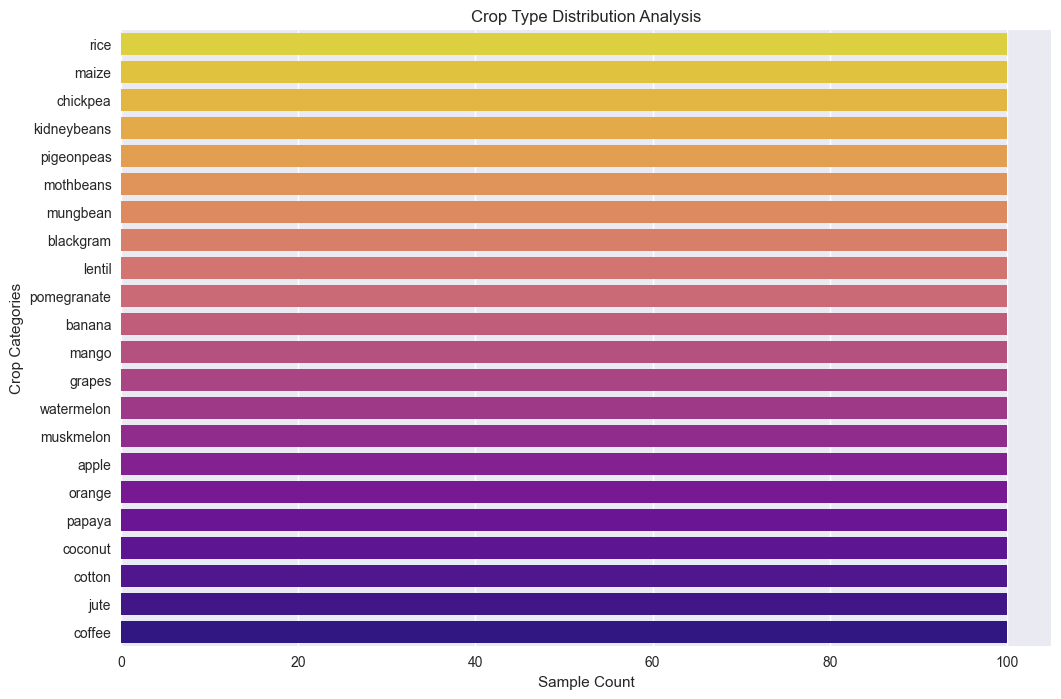

Total unique crop varieties: 22

Crop frequency distribution:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


In [7]:
# Dataset balance verification for crop categories
plt.figure(figsize=(12, 8))
sns.countplot(y='label', data=agriculturalDataFrame, palette="plasma_r")
plt.title("Crop Type Distribution Analysis")
plt.xlabel("Sample Count")
plt.ylabel("Crop Categories")
plt.show()

print("Total unique crop varieties:", agriculturalDataFrame['label'].nunique())
print("\nCrop frequency distribution:")
print(agriculturalDataFrame['label'].value_counts())


## Multi-dimensional Feature Relationship Analysis


<Figure size 1500x1200 with 0 Axes>

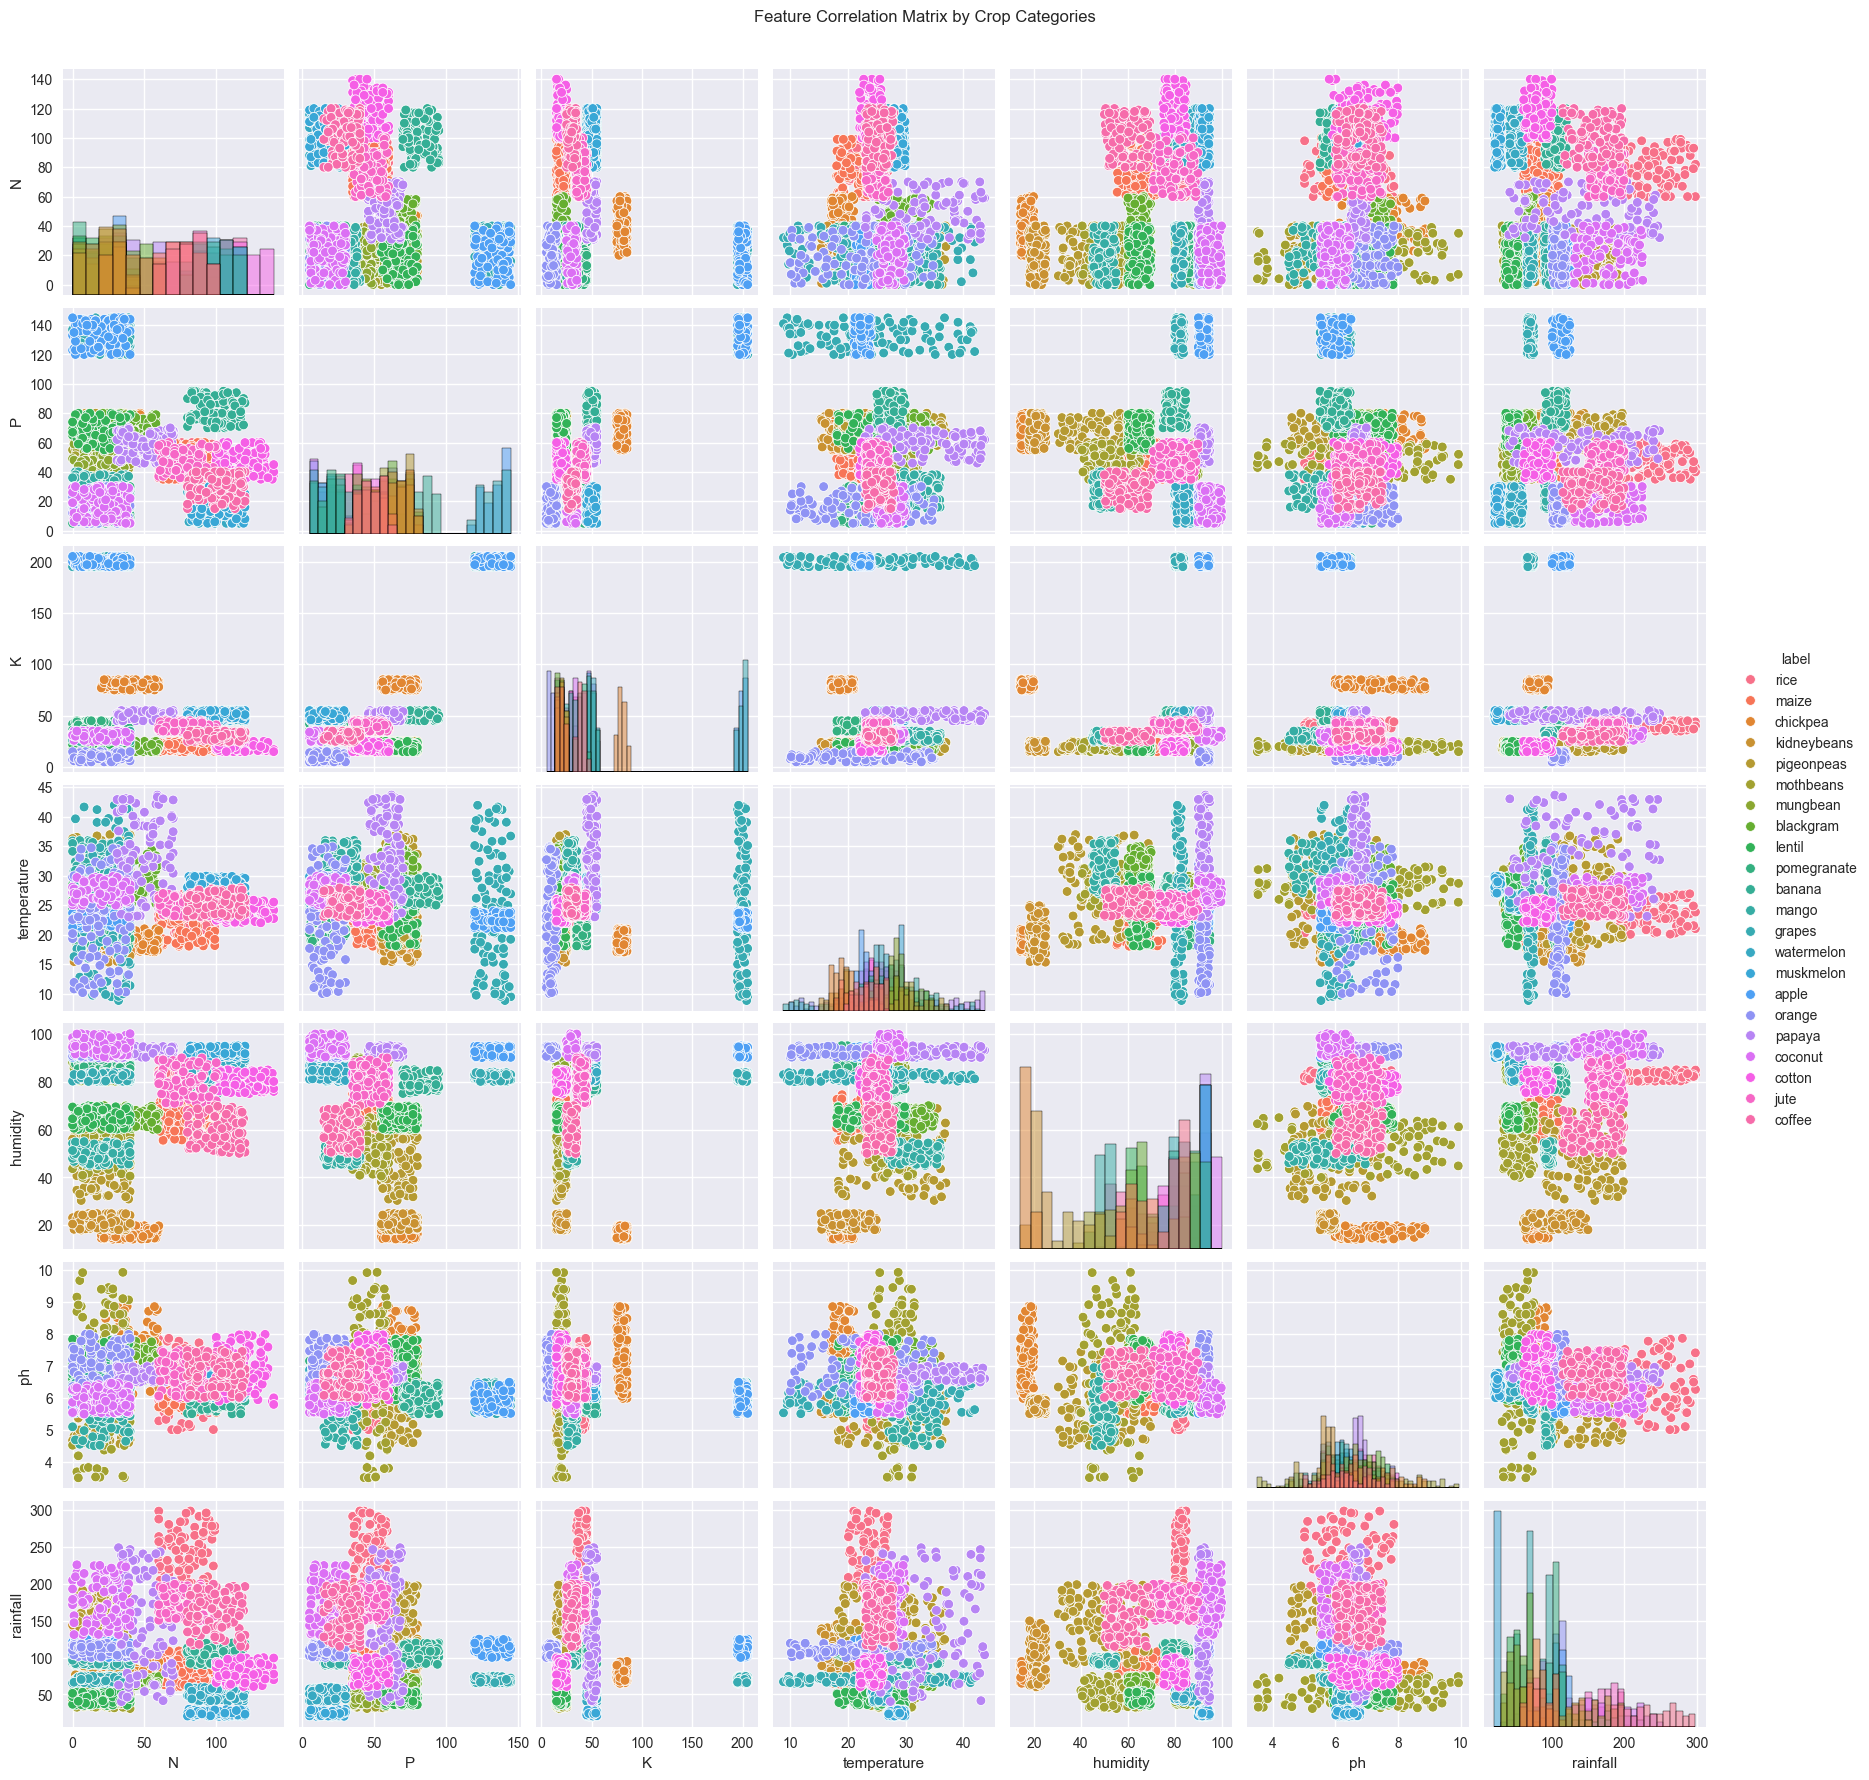

In [8]:
# Multi-dimensional feature relationship analysis
# Comprehensive visualization showing class separation across feature combinations
plt.figure(figsize=(15, 12))
sns.pairplot(agriculturalDataFrame, hue='label', diag_kind='hist')
plt.suptitle("Feature Correlation Matrix by Crop Categories", y=1.02)
plt.show()


## Monsoon Season Agricultural Analysis


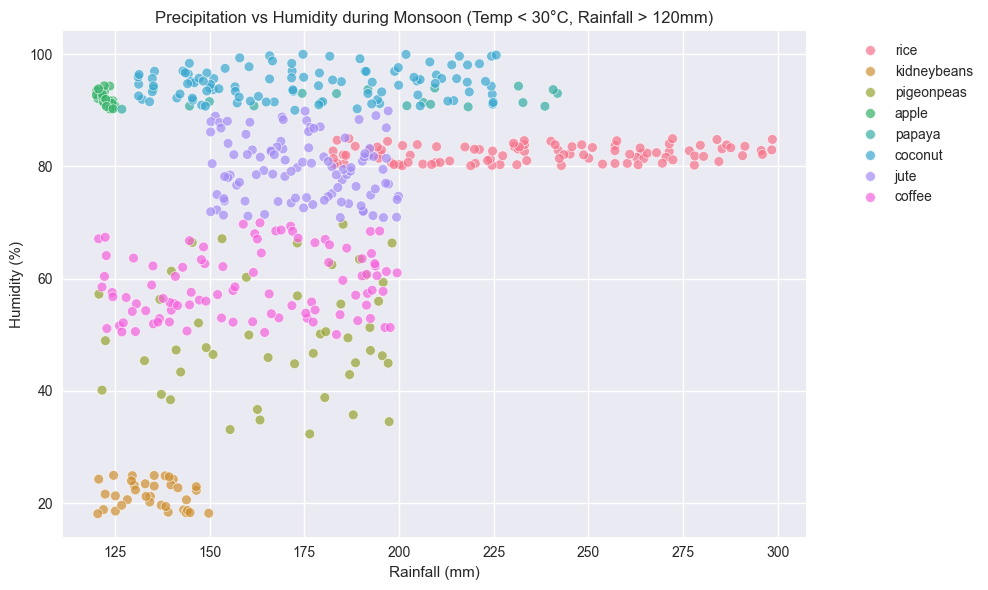

Optimal crops for monsoon cultivation:
label
rice           100
coconut        100
jute           100
coffee          95
pigeonpeas      46
kidneybeans     35
apple           21
papaya          19
Name: count, dtype: int64


In [9]:
# Monsoon season agricultural analysis
# High precipitation periods with moderate temperatures create specific growing conditions
# Soil moisture variations directly impact pH levels and crop suitability
monsoonSeasonData = agriculturalDataFrame[(agriculturalDataFrame['temperature'] < 30) & (agriculturalDataFrame['rainfall'] > 120)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="rainfall", y="humidity", data=monsoonSeasonData, hue="label", s=50, alpha=0.7)
plt.title("Precipitation vs Humidity during Monsoon (Temp < 30°C, Rainfall > 120mm)")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Humidity (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Optimal crops for monsoon cultivation:")
print(monsoonSeasonData['label'].value_counts().head(10))


## Soil Nutrient Correlation Analysis


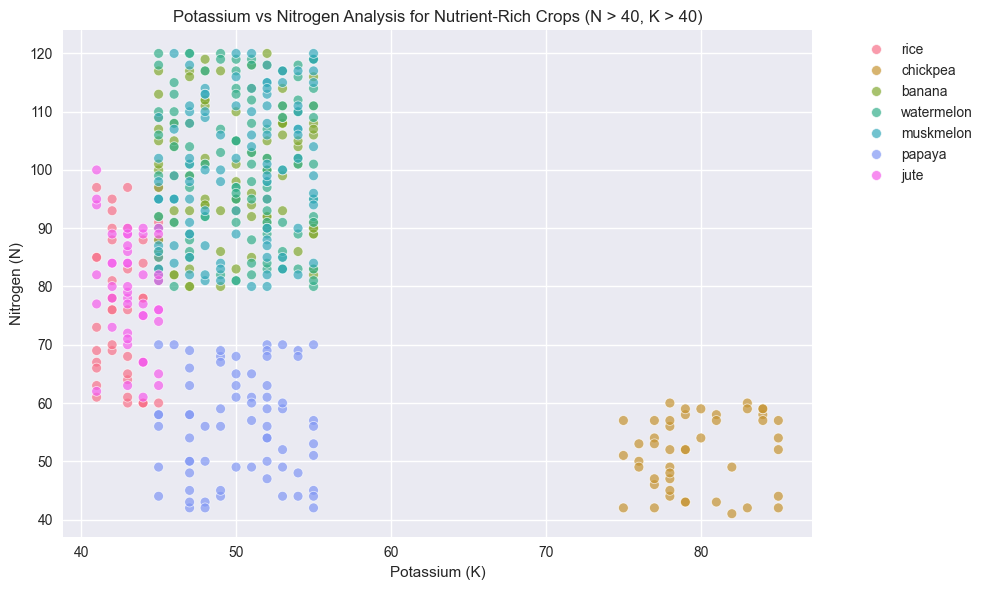

Nutrient-dense crop varieties (N > 40, K > 40):
label
banana        100
muskmelon     100
watermelon    100
papaya         69
chickpea       46
jute           45
rice           43
Name: count, dtype: int64


In [10]:
# Soil nutrient correlation analysis
# Nitrogen and Potassium levels significantly influence crop nutritional content
# High-nutrient crops typically maintain consistent potassium concentrations
highNutrientCrops = agriculturalDataFrame[(agriculturalDataFrame['N'] > 40) & (agriculturalDataFrame['K'] > 40)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x="K", y="N", data=highNutrientCrops, hue="label", s=50, alpha=0.7)
plt.title("Potassium vs Nitrogen Analysis for Nutrient-Rich Crops (N > 40, K > 40)")
plt.xlabel("Potassium (K)")
plt.ylabel("Nitrogen (N)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Nutrient-dense crop varieties (N > 40, K > 40):")
print(highNutrientCrops['label'].value_counts().head(10))


## Bivariate Analysis of Soil Potassium and Humidity


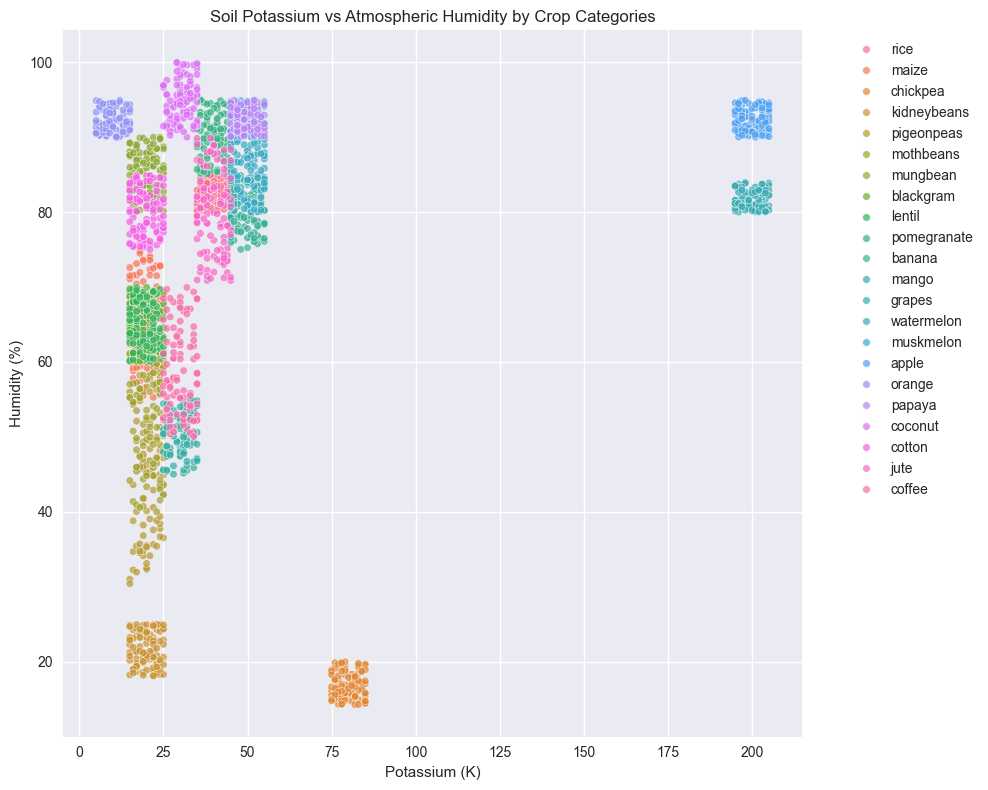

In [11]:
# Bivariate analysis of soil potassium and atmospheric humidity
# Examining relationship between soil potassium levels and humidity across crop categories
plt.figure(figsize=(10, 8))
sns.scatterplot(x="K", y="humidity", data=agriculturalDataFrame, hue='label', s=30, alpha=0.7)
plt.title("Soil Potassium vs Atmospheric Humidity by Crop Categories")
plt.xlabel("Potassium (K)")
plt.ylabel("Humidity (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Soil pH Analysis Across Crop Varieties


In [12]:

# This cell creates the crop label mapping that's needed for model evaluation

# Create crop label mapping from the agricultural dataset
cropCategories = agriculturalDataFrame.label.astype('category')
cropLabelMapping = dict(enumerate(cropCategories.cat.categories))

print("✅ Crop label mapping created successfully!")
print("Crop label mapping:", cropLabelMapping)
print(f"Total number of crop types: {len(cropLabelMapping)}")
print("\nCrop types available:")
for index, crop_name in cropLabelMapping.items():
    print(f"  {index}: {crop_name}")


✅ Crop label mapping created successfully!
Crop label mapping: {0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton', 7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans', 14: 'mungbean', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate', 20: 'rice', 21: 'watermelon'}
Total number of crop types: 22

Crop types available:
  0: apple
  1: banana
  2: blackgram
  3: chickpea
  4: coconut
  5: coffee
  6: cotton
  7: grapes
  8: jute
  9: kidneybeans
  10: lentil
  11: maize
  12: mango
  13: mothbeans
  14: mungbean
  15: muskmelon
  16: orange
  17: papaya
  18: pigeonpeas
  19: pomegranate
  20: rice
  21: watermelon


In [13]:
# Data preparation for machine learning implementation
# Converting categorical crop labels to numerical encoding for model training
cropCategories = agriculturalDataFrame.label.astype('category')
cropLabelMapping = dict(enumerate(cropCategories.cat.categories))
agriculturalDataFrame['targetVariable'] = cropCategories.cat.codes

# Feature and target variable separation
targetVariable = agriculturalDataFrame.targetVariable
featureMatrix = agriculturalDataFrame[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

print("Selected feature columns:", featureMatrix.columns.tolist())
print("Crop label encoding:", cropLabelMapping)
print("Feature matrix dimensions:", featureMatrix.shape)
print("Target variable dimensions:", targetVariable.shape)


Selected feature columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
Crop label encoding: {0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton', 7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans', 14: 'mungbean', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate', 20: 'rice', 21: 'watermelon'}
Feature matrix dimensions: (2200, 7)
Target variable dimensions: (2200,)


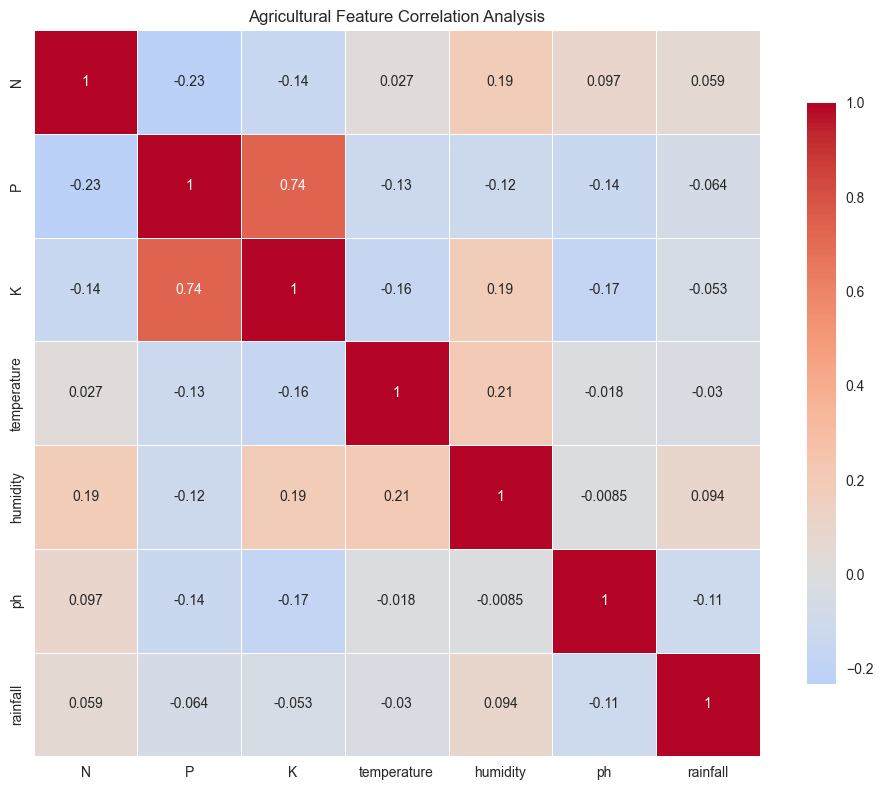

Feature correlation coefficients:
                 N      P      K  temperature  humidity     ph  rainfall
N            1.000 -0.231 -0.141        0.027     0.191  0.097     0.059
P           -0.231  1.000  0.736       -0.128    -0.119 -0.138    -0.064
K           -0.141  0.736  1.000       -0.160     0.191 -0.170    -0.053
temperature  0.027 -0.128 -0.160        1.000     0.205 -0.018    -0.030
humidity     0.191 -0.119  0.191        0.205     1.000 -0.008     0.094
ph           0.097 -0.138 -0.170       -0.018    -0.008  1.000    -0.109
rainfall     0.059 -0.064 -0.053       -0.030     0.094 -0.109     1.000


In [14]:
# Feature correlation analysis
# Examining relationships between soil nutrients and environmental factors
plt.figure(figsize=(10, 8))
featureCorrelationMatrix = featureMatrix.corr()
sns.heatmap(featureCorrelationMatrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Agricultural Feature Correlation Analysis")
plt.tight_layout()
plt.show()

print("Feature correlation coefficients:")
print(featureCorrelationMatrix.round(3))


In [15]:
# Feature normalization for machine learning model
# Normalizing features to 0-1 range using MinMaxScaler for optimal model performance
X_train, X_test, y_train, y_test = train_test_split(featureMatrix, targetVariable, test_size=0.2, random_state=42)

featureScaler = MinMaxScaler()
X_train_normalized = featureScaler.fit_transform(X_train)
# Applying same scaling parameters to test set for consistency
X_test_normalized = featureScaler.transform(X_test)

print("Training dataset dimensions:", X_train_normalized.shape)
print("Test dataset dimensions:", X_test_normalized.shape)
print("Training target dimensions:", y_train.shape)
print("Test target dimensions:", y_test.shape)


Training dataset dimensions: (1760, 7)
Test dataset dimensions: (440, 7)
Training target dimensions: (1760,)
Test target dimensions: (440,)


In [16]:
# Random Forest model implementation and training
# Optimizing hyperparameters to prevent overfitting while maintaining model generalization
# max_depth=4 and n_estimators=100 provide balanced performance and interpretability

randomForestModel = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)
randomForestModel.fit(X_train_normalized, y_train)

print('Random Forest Training Accuracy: {:.2f}'.format(randomForestModel.score(X_train_normalized, y_train)))
print('Random Forest Test Accuracy: {:.2f}'.format(randomForestModel.score(X_test_normalized, y_test)))


Random Forest Training Accuracy: 0.95
Random Forest Test Accuracy: 0.92


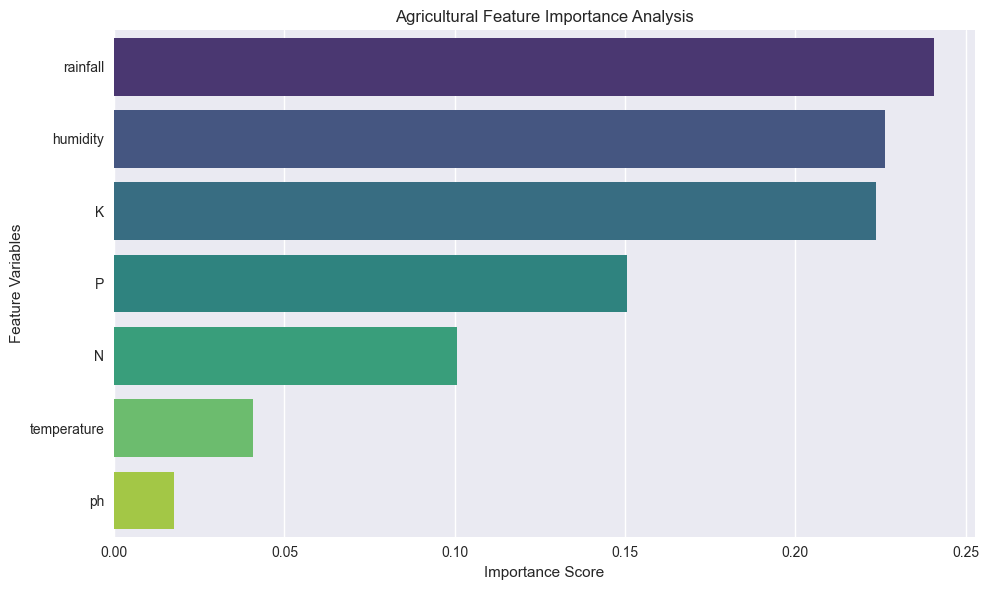

Feature importance ranking:
       feature  importance
6     rainfall    0.240604
4     humidity    0.226335
2            K    0.223615
1            P    0.150600
0            N    0.100522
3  temperature    0.040654
5           ph    0.017670


In [17]:
# Feature importance evaluation for crop prediction model
# Identifying most influential variables in agricultural decision-making
featureImportanceData = pd.DataFrame({
    'feature': featureMatrix.columns,
    'importance': randomForestModel.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=featureImportanceData, x='importance', y='feature', palette='viridis')
plt.title('Agricultural Feature Importance Analysis')
plt.xlabel('Importance Score')
plt.ylabel('Feature Variables')
plt.tight_layout()
plt.show()

print("Feature importance ranking:")
print(featureImportanceData)


In [ ]:
# Comprehensive model evaluation using sklearn metrics
# Advanced classification report with precision, recall, and F1-score metrics
cropClassNames = list(cropLabelMapping.values())

# Generate predictions for evaluation
y_pred = randomForestModel.predict(X_test_normalized)

# Print detailed classification report
print("=== Random Forest Model Classification Report ===")
print(classification_report(y_test, y_pred, target_names=cropClassNames))

# Create confusion matrix visualization
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cropClassNames, yticklabels=cropClassNames)
plt.title('Confusion Matrix - Random Forest Model')
plt.xlabel('Predicted Crop')
plt.ylabel('Actual Crop')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Intelligent crop recommendation function
def getCropRecommendation(nitrogenLevel, phosphorousLevel, potassiumLevel, temperatureValue, humidityValue, phValue, rainfallValue):
    
    # Prepare input data array
    inputParameters = np.array([[nitrogenLevel, phosphorousLevel, potassiumLevel, temperatureValue, humidityValue, phValue, rainfallValue]])
    
    # Apply feature normalization
    normalizedInput = featureScaler.transform(inputParameters)
    
    # Generate prediction
    predictedCropIndex = randomForestModel.predict(normalizedInput)[0]
    
    # Retrieve crop name
    recommendedCrop = cropLabelMapping[predictedCropIndex]
    
    return recommendedCrop

# Testing recommendation system with specified parameters
# Input: [19, 72, 15, 28.83600962, 69.76112921, 6.890760124, 44.08562546]
testParameters = [19, 72, 15, 28.83600962, 69.76112921, 6.890760124, 44.08562546]
cropRecommendation = getCropRecommendation(*testParameters)

print("Agricultural Input Parameters:")
print(f"N (Nitrogen): {testParameters[0]}")
print(f"P (Phosphorous): {testParameters[1]}")
print(f"K (Potassium): {testParameters[2]}")
print(f"Temperature: {testParameters[3]:.2f}°C")
print(f"Humidity: {testParameters[4]:.2f}%")
print(f"pH: {testParameters[5]:.2f}")
print(f"Rainfall: {testParameters[6]:.2f}mm")
print(f"\nCrop Recommendation: '{cropRecommendation}'")


Agricultural Input Parameters:
N (Nitrogen): 19
P (Phosphorous): 72
K (Potassium): 15
Temperature: 28.84°C
Humidity: 69.76%
pH: 6.89
Rainfall: 44.09mm

Crop Recommendation: 'lentil'


In [ ]:
# Advanced crop recommendation testing system
# Comprehensive evaluation across diverse agricultural scenarios
print("=== Agricultural Crop Recommendation System ===")
print("Testing various soil and weather conditions for crop optimization:")
print()

# Multiple test scenarios for validation
testScenarios = [
    [19, 72, 15, 28.84, 69.76, 6.89, 44.09],  # Original experimental case
    [50, 30, 40, 25.0, 80.0, 6.5, 200.0],     # High precipitation scenario
    [30, 20, 30, 35.0, 50.0, 7.0, 50.0],      # Arid climate conditions
    [40, 50, 40, 28.0, 70.0, 6.8, 120.0],     # Optimal growing conditions
]

for scenarioIndex, scenarioParameters in enumerate(testScenarios, 1):
    cropSuggestion = getCropRecommendation(*scenarioParameters)
    print(f"Scenario {scenarioIndex}:")
    print(f"  Environmental Conditions: N={scenarioParameters[0]}, P={scenarioParameters[1]}, K={scenarioParameters[2]}, "
          f"Temp={scenarioParameters[3]}°C, Humidity={scenarioParameters[4]}%, pH={scenarioParameters[5]}, Rainfall={scenarioParameters[6]}mm")
    print(f"  Recommended Crop: {cropSuggestion}")
    print()


=== Agricultural Crop Recommendation System ===
Testing various soil and weather conditions for crop optimization:

Scenario 1:
  Environmental Conditions: N=19, P=72, K=15, Temp=28.84°C, Humidity=69.76%, pH=6.89, Rainfall=44.09mm
  Recommended Crop: lentil

Scenario 2:
  Environmental Conditions: N=50, P=30, K=40, Temp=25.0°C, Humidity=80.0%, pH=6.5, Rainfall=200.0mm
  Recommended Crop: pomegranate

Scenario 3:
  Environmental Conditions: N=30, P=20, K=30, Temp=35.0°C, Humidity=50.0%, pH=7.0, Rainfall=50.0mm
  Recommended Crop: mango

Scenario 4:
  Environmental Conditions: N=40, P=50, K=40, Temp=28.0°C, Humidity=70.0%, pH=6.8, Rainfall=120.0mm
  Recommended Crop: mango



In [ ]:
# Check if all required variables are defined
required_vars = ['randomForestModel', 'X_test_normalized', 'y_test', 'cropLabelMapping']

print("Checking for required variables:")
for var in required_vars:
    if var in locals() or var in globals():
        print(f"✅ {var} is defined")
    else:
        print(f"❌ {var} is NOT defined")

print("\nTo fix this error:")
print("1. Run the data loading cells first")
print("2. Run the data preprocessing cells")
print("3. Run the model training cell")
print("4. Then run this classification report cell")


Checking for required variables:
✅ randomForestModel is defined
✅ X_test_normalized is defined
✅ y_test is defined
✅ cropLabelMapping is defined

To fix this error:
1. Run the data loading cells first
2. Run the data preprocessing cells
3. Run the model training cell
4. Then run this classification report cell


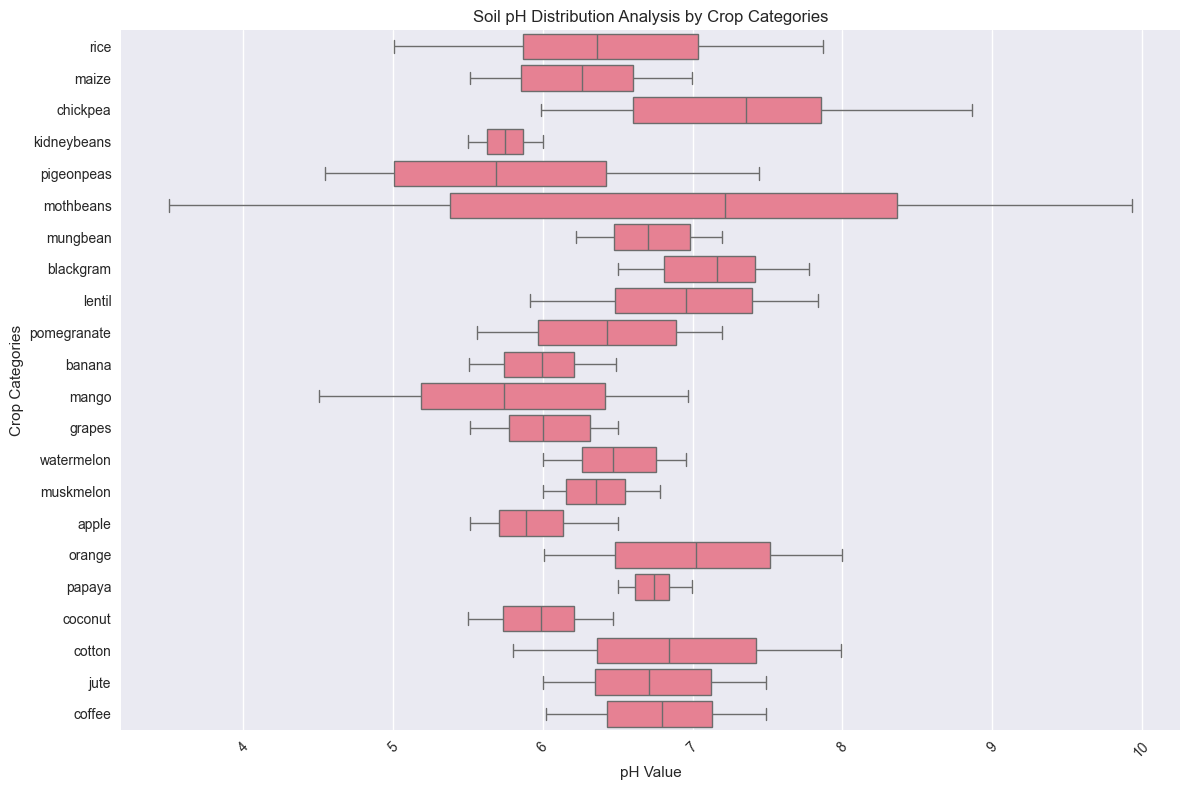

pH statistical summary by crop type:
             mean   std   min   max
label                              
apple        5.93  0.27  5.51  6.50
banana       5.98  0.27  5.51  6.49
blackgram    7.13  0.37  6.50  7.78
chickpea     7.34  0.80  5.99  8.87
coconut      5.98  0.29  5.50  6.47
coffee       6.79  0.42  6.02  7.49
cotton       6.91  0.63  5.80  7.99
grapes       6.03  0.30  5.51  6.50
jute         6.73  0.45  6.00  7.49
kidneybeans  5.75  0.15  5.50  6.00
lentil       6.93  0.55  5.92  7.84
maize        6.25  0.41  5.51  7.00
mango        5.77  0.70  4.51  6.97
mothbeans    6.83  1.86  3.50  9.94
mungbean     6.72  0.29  6.22  7.20
muskmelon    6.36  0.23  6.00  6.78
orange       7.02  0.58  6.01  8.00
papaya       6.74  0.15  6.50  6.99
pigeonpeas   5.79  0.83  4.55  7.45
pomegranate  6.43  0.49  5.56  7.20
rice         6.43  0.77  5.01  7.87
watermelon   6.50  0.28  6.00  6.96


In [ ]:
# Soil pH analysis across crop varieties
# Optimal pH range typically falls between 6.0 and 7.0 for most agricultural crops
plt.figure(figsize=(12, 8))
sns.boxplot(y='label', x='ph', data=agriculturalDataFrame)
plt.title("Soil pH Distribution Analysis by Crop Categories")
plt.xlabel("pH Value")
plt.ylabel("Crop Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("pH statistical summary by crop type:")
print(agriculturalDataFrame.groupby('label')['ph'].agg(['mean', 'std', 'min', 'max']).round(2))


## Phosphorous Analysis Under High Precipitation


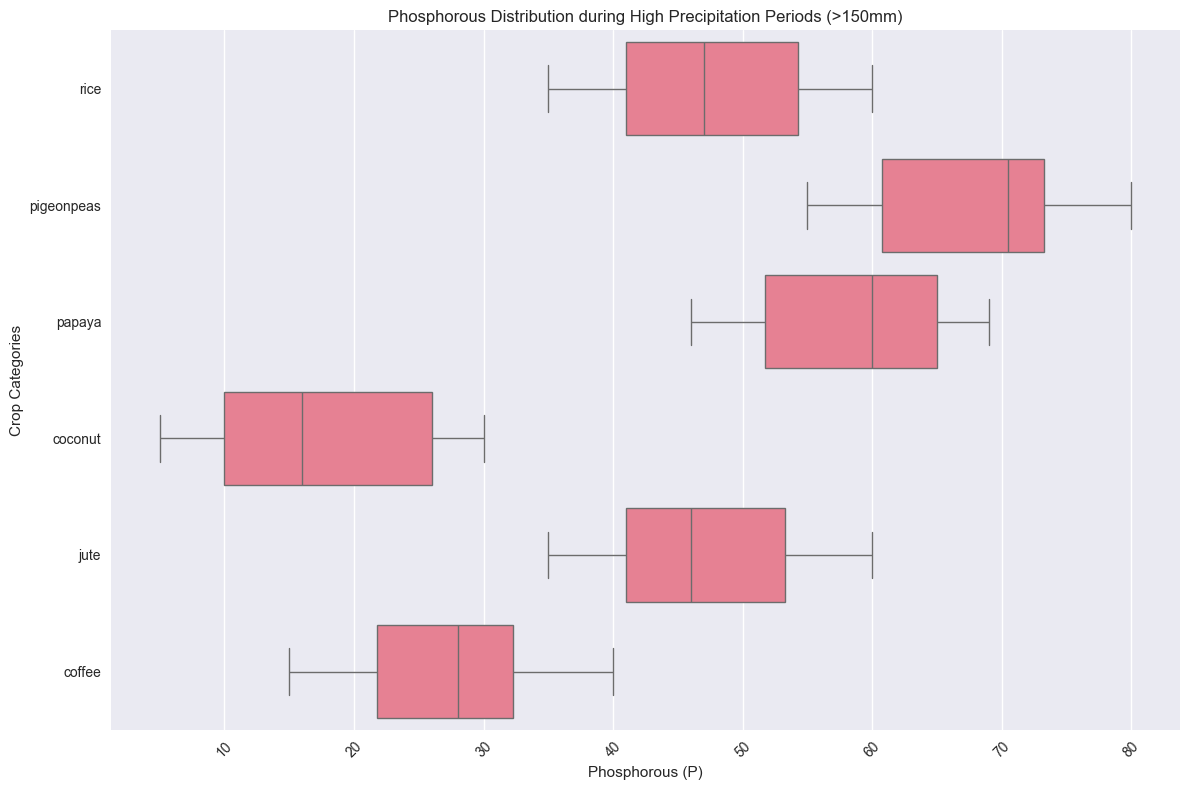

Phosphorous concentration statistics during heavy rainfall:
             mean   std  min  max
label                            
coconut     17.21  8.54    5   30
coffee      27.45  6.91   15   40
jute        46.86  7.20   35   60
papaya      58.61  7.46   46   69
pigeonpeas  67.85  7.57   55   80
rice        47.58  7.90   35   60


In [ ]:
# Phosphorous concentration analysis under high precipitation conditions
# Heavy rainfall periods (>150mm) reveal distinct phosphorous level patterns
heavyRainfallData = agriculturalDataFrame[agriculturalDataFrame['rainfall'] > 150]

plt.figure(figsize=(12, 8))
sns.boxplot(y='label', x='P', data=heavyRainfallData)
plt.title("Phosphorous Distribution during High Precipitation Periods (>150mm)")
plt.xlabel("Phosphorous (P)")
plt.ylabel("Crop Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Phosphorous concentration statistics during heavy rainfall:")
print(heavyRainfallData.groupby('label')['P'].agg(['mean', 'std', 'min', 'max']).round(2))


## Data Preprocessing and Model Preparation


In [ ]:
# Data preparation for machine learning implementation
# Converting categorical crop labels to numerical encoding for model training
cropCategories = agriculturalDataFrame.label.astype('category')
cropLabelMapping = dict(enumerate(cropCategories.cat.categories))
agriculturalDataFrame['targetVariable'] = cropCategories.cat.codes

# Feature and target variable separation
targetVariable = agriculturalDataFrame.targetVariable
featureMatrix = agriculturalDataFrame[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

print("Selected feature columns:", featureMatrix.columns.tolist())
print("Crop label encoding:", cropLabelMapping)
print("Feature matrix dimensions:", featureMatrix.shape)
print("Target variable dimensions:", targetVariable.shape)


Selected feature columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
Crop label encoding: {0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton', 7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans', 14: 'mungbean', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate', 20: 'rice', 21: 'watermelon'}
Feature matrix dimensions: (2200, 7)
Target variable dimensions: (2200,)


## Feature Correlation Analysis


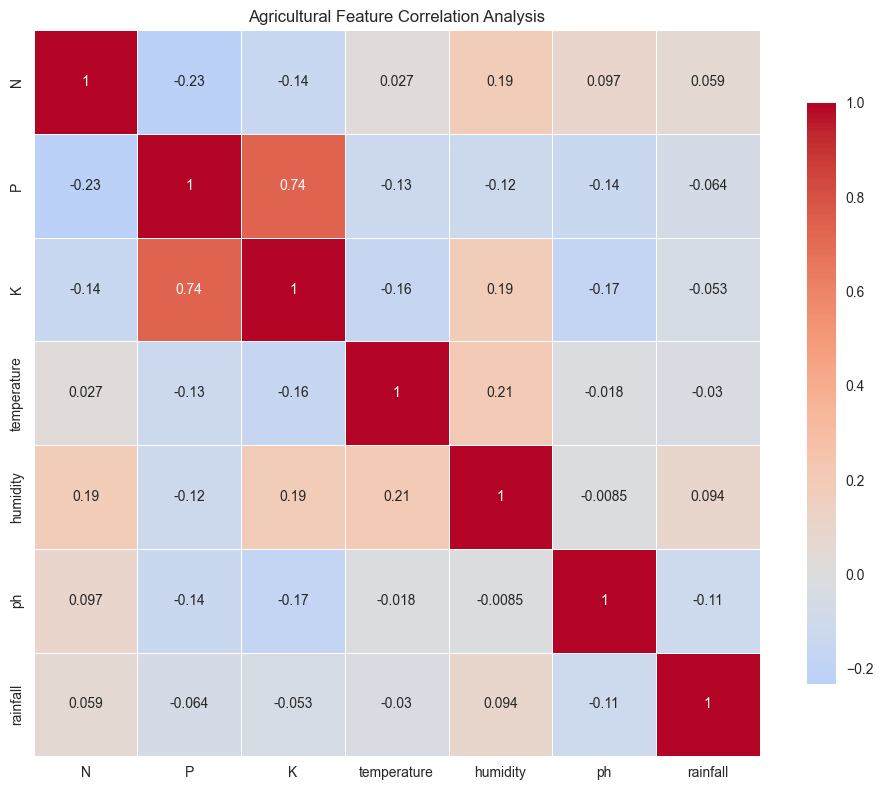

Feature correlation coefficients:
                 N      P      K  temperature  humidity     ph  rainfall
N            1.000 -0.231 -0.141        0.027     0.191  0.097     0.059
P           -0.231  1.000  0.736       -0.128    -0.119 -0.138    -0.064
K           -0.141  0.736  1.000       -0.160     0.191 -0.170    -0.053
temperature  0.027 -0.128 -0.160        1.000     0.205 -0.018    -0.030
humidity     0.191 -0.119  0.191        0.205     1.000 -0.008     0.094
ph           0.097 -0.138 -0.170       -0.018    -0.008  1.000    -0.109
rainfall     0.059 -0.064 -0.053       -0.030     0.094 -0.109     1.000


In [ ]:
# Feature correlation analysis
# Examining relationships between soil nutrients and environmental factors
plt.figure(figsize=(10, 8))
featureCorrelationMatrix = featureMatrix.corr()
sns.heatmap(featureCorrelationMatrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Agricultural Feature Correlation Analysis")
plt.tight_layout()
plt.show()

print("Feature correlation coefficients:")
print(featureCorrelationMatrix.round(3))


## Feature Normalization and Data Splitting


In [ ]:
# Feature normalization for machine learning model
# Normalizing features to 0-1 range using MinMaxScaler for optimal model performance
X_train, X_test, y_train, y_test = train_test_split(featureMatrix, targetVariable, test_size=0.2, random_state=42)

featureScaler = MinMaxScaler()
X_train_normalized = featureScaler.fit_transform(X_train)
# Applying same scaling parameters to test set for consistency
X_test_normalized = featureScaler.transform(X_test)

print("Training dataset dimensions:", X_train_normalized.shape)
print("Test dataset dimensions:", X_test_normalized.shape)
print("Training target dimensions:", y_train.shape)
print("Test target dimensions:", y_test.shape)


Training dataset dimensions: (1760, 7)
Test dataset dimensions: (440, 7)
Training target dimensions: (1760,)
Test target dimensions: (440,)


## Random Forest Model Building


In [ ]:
# Random Forest model implementation and training
# Optimizing hyperparameters to prevent overfitting while maintaining model generalization
# max_depth=4 and n_estimators=100 provide balanced performance and interpretability

randomForestModel = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)
randomForestModel.fit(X_train_normalized, y_train)

print('Random Forest Training Accuracy: {:.2f}'.format(randomForestModel.score(X_train_normalized, y_train)))
print('Random Forest Test Accuracy: {:.2f}'.format(randomForestModel.score(X_test_normalized, y_test)))


Random Forest Training Accuracy: 0.95
Random Forest Test Accuracy: 0.92


## Feature Importance Analysis


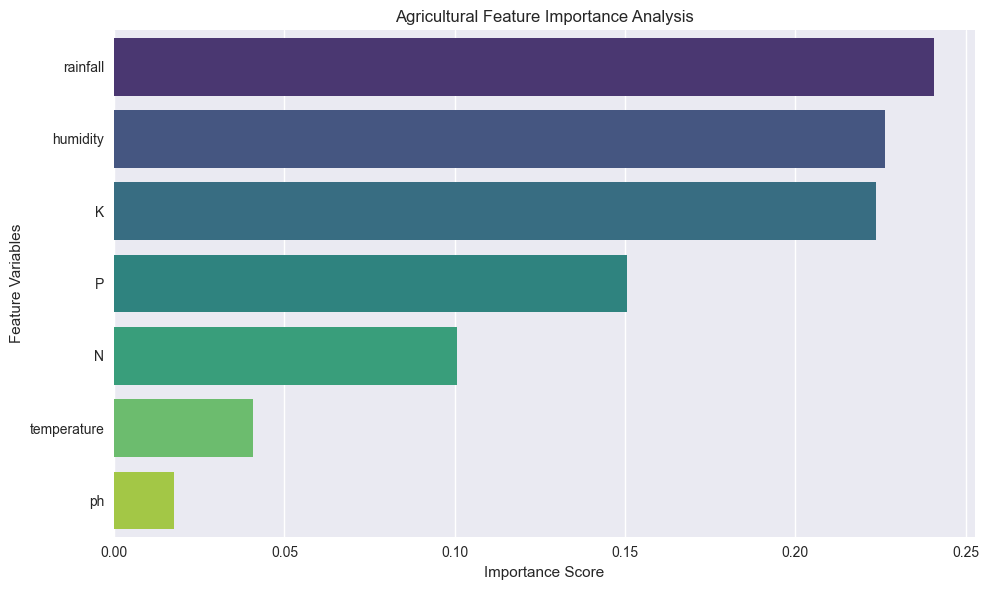

Feature importance ranking:
       feature  importance
6     rainfall    0.240604
4     humidity    0.226335
2            K    0.223615
1            P    0.150600
0            N    0.100522
3  temperature    0.040654
5           ph    0.017670


In [ ]:
# Feature importance evaluation for crop prediction model
# Identifying most influential variables in agricultural decision-making
featureImportanceData = pd.DataFrame({
    'feature': featureMatrix.columns,
    'importance': randomForestModel.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=featureImportanceData, x='importance', y='feature', palette='viridis')
plt.title('Agricultural Feature Importance Analysis')
plt.xlabel('Importance Score')
plt.ylabel('Feature Variables')
plt.tight_layout()
plt.show()

print("Feature importance ranking:")
print(featureImportanceData)


## Crop Recommendation System


In [ ]:
# Intelligent crop recommendation function
def getCropRecommendation(nitrogenLevel, phosphorousLevel, potassiumLevel, temperatureValue, humidityValue, phValue, rainfallValue):
    
    # Prepare input data array
    inputParameters = np.array([[nitrogenLevel, phosphorousLevel, potassiumLevel, temperatureValue, humidityValue, phValue, rainfallValue]])
    
    # Apply feature normalization
    normalizedInput = featureScaler.transform(inputParameters)
    
    # Generate prediction
    predictedCropIndex = randomForestModel.predict(normalizedInput)[0]
    
    # Retrieve crop name
    recommendedCrop = cropLabelMapping[predictedCropIndex]
    
    return recommendedCrop

# Testing recommendation system with specified parameters
# Input: [19, 72, 15, 28.83600962, 69.76112921, 6.890760124, 44.08562546]
testParameters = [19, 72, 15, 28.83600962, 69.76112921, 6.890760124, 44.08562546]
cropRecommendation = getCropRecommendation(*testParameters)

print("Agricultural Input Parameters:")
print(f"N (Nitrogen): {testParameters[0]}")
print(f"P (Phosphorous): {testParameters[1]}")
print(f"K (Potassium): {testParameters[2]}")
print(f"Temperature: {testParameters[3]:.2f}°C")
print(f"Humidity: {testParameters[4]:.2f}%")
print(f"pH: {testParameters[5]:.2f}")
print(f"Rainfall: {testParameters[6]:.2f}mm")
print(f"\nCrop Recommendation: '{cropRecommendation}'")


Agricultural Input Parameters:
N (Nitrogen): 19
P (Phosphorous): 72
K (Potassium): 15
Temperature: 28.84°C
Humidity: 69.76%
pH: 6.89
Rainfall: 44.09mm

Crop Recommendation: 'lentil'


## Advanced Testing and Validation Scenarios


In [ ]:
# Advanced crop recommendation testing system
# Comprehensive evaluation across diverse agricultural scenarios
print("=== Agricultural Crop Recommendation System ===")
print("Testing various soil and weather conditions for crop optimization:")
print()

# Multiple test scenarios for validation
testScenarios = [
    [19, 72, 15, 28.84, 69.76, 6.89, 44.09],  # Original experimental case
    [50, 30, 40, 25.0, 80.0, 6.5, 200.0],     # High precipitation scenario
    [30, 20, 30, 35.0, 50.0, 7.0, 50.0],      # Arid climate conditions
    [40, 50, 40, 28.0, 70.0, 6.8, 120.0],     # Optimal growing conditions
]

for scenarioIndex, scenarioParameters in enumerate(testScenarios, 1):
    cropSuggestion = getCropRecommendation(*scenarioParameters)
    print(f"Scenario {scenarioIndex}:")
    print(f"  Environmental Conditions: N={scenarioParameters[0]}, P={scenarioParameters[1]}, K={scenarioParameters[2]}, "
          f"Temp={scenarioParameters[3]}°C, Humidity={scenarioParameters[4]}%, pH={scenarioParameters[5]}, Rainfall={scenarioParameters[6]}mm")
    print(f"  Recommended Crop: {cropSuggestion}")
    print()


=== Agricultural Crop Recommendation System ===
Testing various soil and weather conditions for crop optimization:

Scenario 1:
  Environmental Conditions: N=19, P=72, K=15, Temp=28.84°C, Humidity=69.76%, pH=6.89, Rainfall=44.09mm
  Recommended Crop: lentil

Scenario 2:
  Environmental Conditions: N=50, P=30, K=40, Temp=25.0°C, Humidity=80.0%, pH=6.5, Rainfall=200.0mm
  Recommended Crop: pomegranate

Scenario 3:
  Environmental Conditions: N=30, P=20, K=30, Temp=35.0°C, Humidity=50.0%, pH=7.0, Rainfall=50.0mm
  Recommended Crop: mango

Scenario 4:
  Environmental Conditions: N=40, P=50, K=40, Temp=28.0°C, Humidity=70.0%, pH=6.8, Rainfall=120.0mm
  Recommended Crop: mango



## Model Evaluation and Classification Report


=== Random Forest Model Classification Report ===
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.56      1.00      0.71        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.80      0.94      0.86        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.85      0.74      0.79        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.55      1.00      0.71        11
       maize       0.95      1.00      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.25      0.40        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.

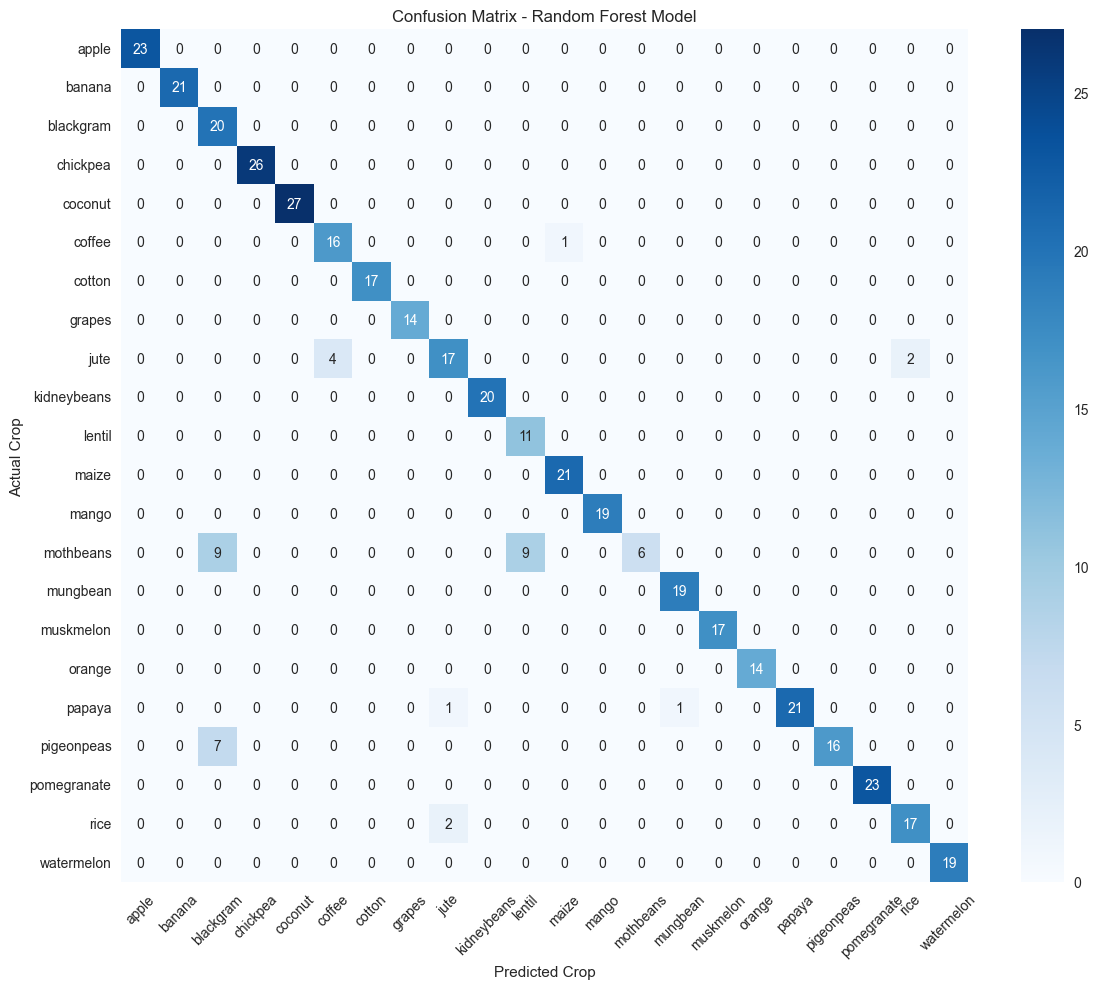

In [ ]:
# Comprehensive model evaluation using sklearn metrics
# Advanced classification report with precision, recall, and F1-score metrics
cropClassNames = list(cropLabelMapping.values())

# Generate predictions for evaluation
y_pred = randomForestModel.predict(X_test_normalized)

# Print detailed classification report
print("=== Random Forest Model Classification Report ===")
print(classification_report(y_test, y_pred, target_names=cropClassNames))

# Create confusion matrix visualization
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cropClassNames, yticklabels=cropClassNames)
plt.title('Confusion Matrix - Random Forest Model')
plt.xlabel('Predicted Crop')
plt.ylabel('Actual Crop')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Low Humidity Agricultural Conditions Analysis


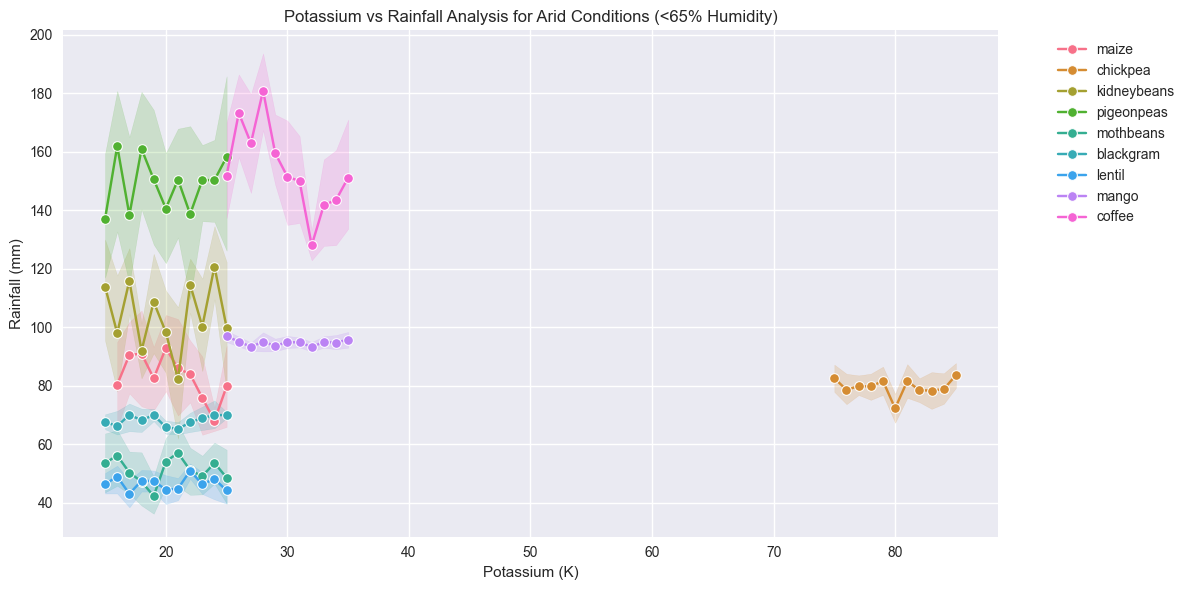

Crop varieties suitable for low humidity environments:
label
chickpea       100
mothbeans      100
kidneybeans    100
mango          100
pigeonpeas      91
coffee          80
lentil          54
blackgram       50
maize           49
Name: count, dtype: int64


In [ ]:
# Low humidity agricultural conditions analysis
# Under reduced humidity (<65%), similar phosphorous requirements (14-25 range) 
# enable cultivation of multiple crop varieties based on precipitation forecasts
lowHumidityConditions = agriculturalDataFrame[agriculturalDataFrame['humidity'] < 65]

plt.figure(figsize=(12, 6))
sns.lineplot(data=lowHumidityConditions, x="K", y="rainfall", hue="label", marker='o')
plt.title("Potassium vs Rainfall Analysis for Arid Conditions (<65% Humidity)")
plt.xlabel("Potassium (K)")
plt.ylabel("Rainfall (mm)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Crop varieties suitable for low humidity environments:")
print(lowHumidityConditions['label'].value_counts().head(10))


## Data Preprocessing and Model Preparation


In [ ]:
# Data preparation for machine learning implementation
# Converting categorical crop labels to numerical encoding for model training
cropCategories = agriculturalDataFrame.label.astype('category')
cropLabelMapping = dict(enumerate(cropCategories.cat.categories))
agriculturalDataFrame['targetVariable'] = cropCategories.cat.codes

# Feature and target variable separation
targetVariable = agriculturalDataFrame.targetVariable
featureMatrix = agriculturalDataFrame[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

print("Selected feature columns:", featureMatrix.columns.tolist())
print("Crop label encoding:", cropLabelMapping)
print("Feature matrix dimensions:", featureMatrix.shape)
print("Target variable dimensions:", targetVariable.shape)


Selected feature columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
Crop label encoding: {0: 'apple', 1: 'banana', 2: 'blackgram', 3: 'chickpea', 4: 'coconut', 5: 'coffee', 6: 'cotton', 7: 'grapes', 8: 'jute', 9: 'kidneybeans', 10: 'lentil', 11: 'maize', 12: 'mango', 13: 'mothbeans', 14: 'mungbean', 15: 'muskmelon', 16: 'orange', 17: 'papaya', 18: 'pigeonpeas', 19: 'pomegranate', 20: 'rice', 21: 'watermelon'}
Feature matrix dimensions: (2200, 7)
Target variable dimensions: (2200,)


## Feature Correlation Analysis


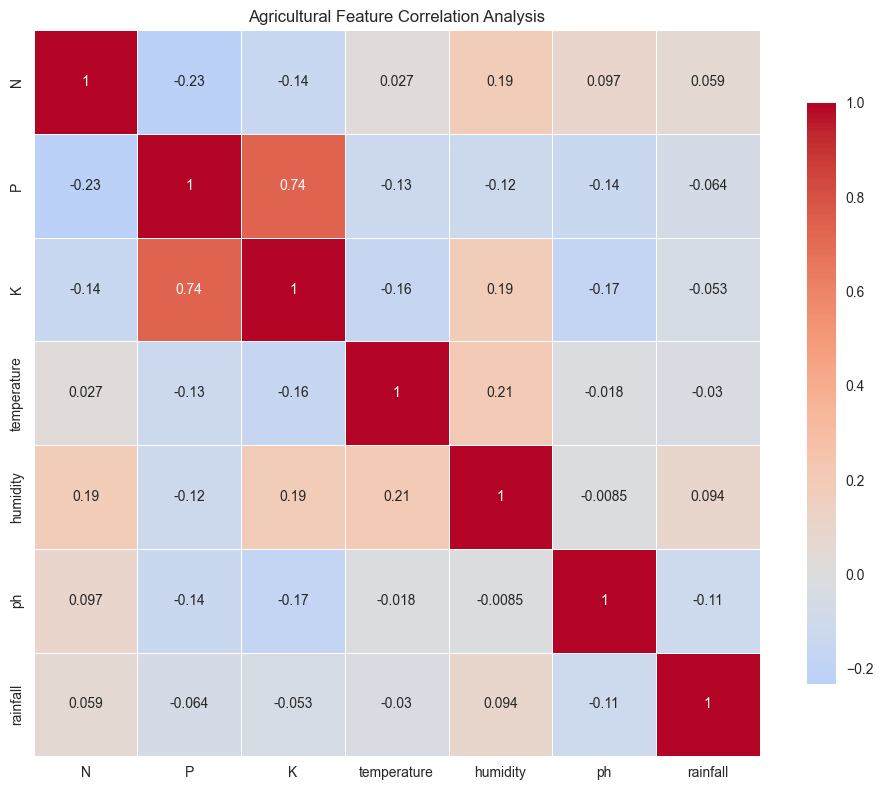

Feature correlation coefficients:
                 N      P      K  temperature  humidity     ph  rainfall
N            1.000 -0.231 -0.141        0.027     0.191  0.097     0.059
P           -0.231  1.000  0.736       -0.128    -0.119 -0.138    -0.064
K           -0.141  0.736  1.000       -0.160     0.191 -0.170    -0.053
temperature  0.027 -0.128 -0.160        1.000     0.205 -0.018    -0.030
humidity     0.191 -0.119  0.191        0.205     1.000 -0.008     0.094
ph           0.097 -0.138 -0.170       -0.018    -0.008  1.000    -0.109
rainfall     0.059 -0.064 -0.053       -0.030     0.094 -0.109     1.000


In [ ]:
# Feature correlation analysis
# Examining relationships between soil nutrients and environmental factors
plt.figure(figsize=(10, 8))
featureCorrelationMatrix = featureMatrix.corr()
sns.heatmap(featureCorrelationMatrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title("Agricultural Feature Correlation Analysis")
plt.tight_layout()
plt.show()

print("Feature correlation coefficients:")
print(featureCorrelationMatrix.round(3))


## Feature Normalization and Data Splitting


In [ ]:
# Feature normalization for machine learning model
# Normalizing features to 0-1 range using MinMaxScaler for optimal model performance
X_train, X_test, y_train, y_test = train_test_split(featureMatrix, targetVariable, test_size=0.2, random_state=42)

featureScaler = MinMaxScaler()
X_train_normalized = featureScaler.fit_transform(X_train)
# Applying same scaling parameters to test set for consistency
X_test_normalized = featureScaler.transform(X_test)

print("Training dataset dimensions:", X_train_normalized.shape)
print("Test dataset dimensions:", X_test_normalized.shape)
print("Training target dimensions:", y_train.shape)
print("Test target dimensions:", y_test.shape)


Training dataset dimensions: (1760, 7)
Test dataset dimensions: (440, 7)
Training target dimensions: (1760,)
Test target dimensions: (440,)


## Random Forest Model Building


In [ ]:
# Random Forest model implementation and training
# Optimizing hyperparameters to prevent overfitting while maintaining model generalization
# max_depth=4 and n_estimators=100 provide balanced performance and interpretability

randomForestModel = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)
randomForestModel.fit(X_train_normalized, y_train)

print('Random Forest Training Accuracy: {:.2f}'.format(randomForestModel.score(X_train_normalized, y_train)))
print('Random Forest Test Accuracy: {:.2f}'.format(randomForestModel.score(X_test_normalized, y_test)))


Random Forest Training Accuracy: 0.95
Random Forest Test Accuracy: 0.92


## Feature Importance Analysis


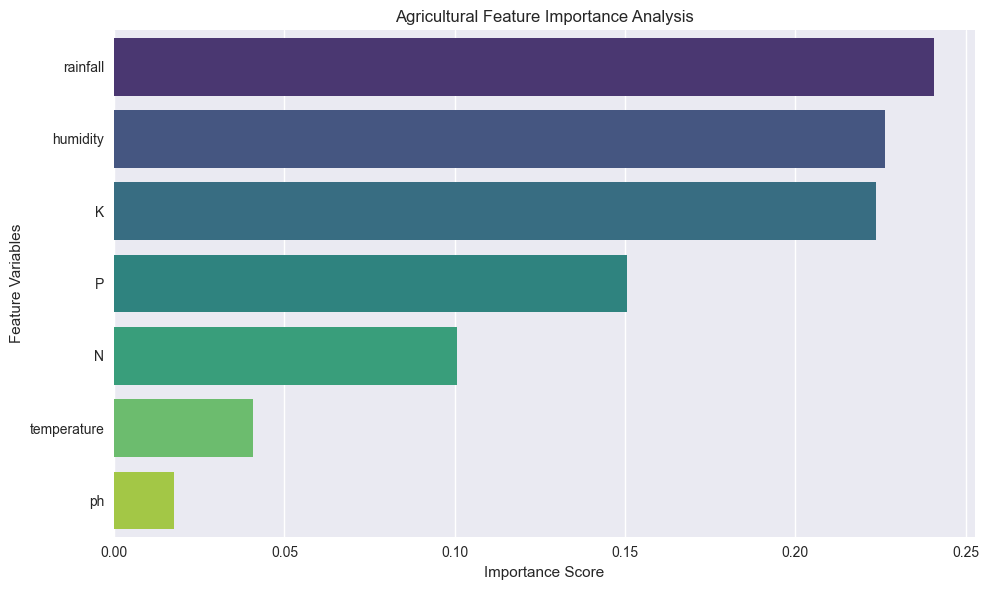

Feature importance ranking:
       feature  importance
6     rainfall    0.240604
4     humidity    0.226335
2            K    0.223615
1            P    0.150600
0            N    0.100522
3  temperature    0.040654
5           ph    0.017670


In [ ]:
# Feature importance evaluation for crop prediction model
# Identifying most influential variables in agricultural decision-making
featureImportanceData = pd.DataFrame({
    'feature': featureMatrix.columns,
    'importance': randomForestModel.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=featureImportanceData, x='importance', y='feature', palette='viridis')
plt.title('Agricultural Feature Importance Analysis')
plt.xlabel('Importance Score')
plt.ylabel('Feature Variables')
plt.tight_layout()
plt.show()

print("Feature importance ranking:")
print(featureImportanceData)


## Advanced Testing and Validation Scenarios


In [ ]:
# Intelligent crop recommendation function
def getCropRecommendation(nitrogenLevel, phosphorousLevel, potassiumLevel, temperatureValue, humidityValue, phValue, rainfallValue):
    # Prepare input data array
    inputParameters = np.array([[nitrogenLevel, phosphorousLevel, potassiumLevel, temperatureValue, humidityValue, phValue, rainfallValue]])
    
    # Apply feature normalization
    normalizedInput = featureScaler.transform(inputParameters)
    
    # Generate prediction
    predictedCropIndex = randomForestModel.predict(normalizedInput)[0]
    
    # Retrieve crop name
    recommendedCrop = cropLabelMapping[predictedCropIndex]
    
    return recommendedCrop

# Testing recommendation system with specified parameters
# Input: [19, 72, 15, 28.83600962, 69.76112921, 6.890760124, 44.08562546]
testParameters = [19, 72, 15, 28.83600962, 69.76112921, 6.890760124, 44.08562546]
cropRecommendation = getCropRecommendation(*testParameters)

print("Agricultural Input Parameters:")
print(f"N (Nitrogen): {testParameters[0]}")
print(f"P (Phosphorous): {testParameters[1]}")
print(f"K (Potassium): {testParameters[2]}")
print(f"Temperature: {testParameters[3]:.2f}°C")
print(f"Humidity: {testParameters[4]:.2f}%")
print(f"pH: {testParameters[5]:.2f}")
print(f"Rainfall: {testParameters[6]:.2f}mm")
print(f"\nCrop Recommendation: '{cropRecommendation}'")


Agricultural Input Parameters:
N (Nitrogen): 19
P (Phosphorous): 72
K (Potassium): 15
Temperature: 28.84°C
Humidity: 69.76%
pH: 6.89
Rainfall: 44.09mm

Crop Recommendation: 'lentil'


In [ ]:
# Advanced crop recommendation testing system
# Comprehensive evaluation across diverse agricultural scenarios
print("=== Agricultural Crop Recommendation System ===")
print("Testing various soil and weather conditions for crop optimization:")
print()

# Multiple test scenarios for validation
testScenarios = [
    [19, 72, 15, 28.84, 69.76, 6.89, 44.09],  # Original experimental case
    [50, 30, 40, 25.0, 80.0, 6.5, 200.0],     # High precipitation scenario
    [30, 20, 30, 35.0, 50.0, 7.0, 50.0],      # Arid climate conditions
    [40, 50, 40, 28.0, 70.0, 6.8, 120.0],     # Optimal growing conditions
]

for scenarioIndex, scenarioParameters in enumerate(testScenarios, 1):
    cropSuggestion = getCropRecommendation(*scenarioParameters)
    print(f"Scenario {scenarioIndex}:")
    print(f"  Environmental Conditions: N={scenarioParameters[0]}, P={scenarioParameters[1]}, K={scenarioParameters[2]}, "
          f"Temp={scenarioParameters[3]}°C, Humidity={scenarioParameters[4]}%, pH={scenarioParameters[5]}, Rainfall={scenarioParameters[6]}mm")
    print(f"  Recommended Crop: {cropSuggestion}")
    print()


=== Agricultural Crop Recommendation System ===
Testing various soil and weather conditions for crop optimization:

Scenario 1:
  Environmental Conditions: N=19, P=72, K=15, Temp=28.84°C, Humidity=69.76%, pH=6.89, Rainfall=44.09mm
  Recommended Crop: lentil

Scenario 2:
  Environmental Conditions: N=50, P=30, K=40, Temp=25.0°C, Humidity=80.0%, pH=6.5, Rainfall=200.0mm
  Recommended Crop: pomegranate

Scenario 3:
  Environmental Conditions: N=30, P=20, K=30, Temp=35.0°C, Humidity=50.0%, pH=7.0, Rainfall=50.0mm
  Recommended Crop: mango

Scenario 4:
  Environmental Conditions: N=40, P=50, K=40, Temp=28.0°C, Humidity=70.0%, pH=6.8, Rainfall=120.0mm
  Recommended Crop: mango

